Seentimen Analilis Aplikasi Shoope Di Google Play Store
Ahmad Zaini - 2501986170
Gracio Elika E.T - 2501971603
Daniel Lee R - 2502030971

scraping data

In [ ]:
!pip install google-play-scraper

Import package

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang = 'id',
    country= 'id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fd99d51b-b5f3-4923-8491-292ec5b28f86,niken ayu,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasinya agak berat ya sebenernya buat hp a...,5,1375,3.14.16,2023-11-27 23:46:02,"Hallo kak Niken, waah makasih ya buat kepercay...",2023-11-28 00:49:10,3.14.16
1,0b7e1e06-529b-4bbd-bbaf-731c9a32b821,Josep Badai Prima,https://play-lh.googleusercontent.com/a-/ALV-U...,Ada masalah dari penggunana voucher yg gak bis...,1,254,3.14.16,2023-12-01 03:10:29,"Hi kak, maaf untuk ketidaknyamannya. Shopee ak...",2023-12-01 04:21:39,3.14.16
2,50908a3d-e64e-4849-bfc2-695efec47077,Agung Bachtiar,https://play-lh.googleusercontent.com/a/ACg8oc...,"Jaringan bagus & stabil sampai 25Mbps, hp juga...",1,1037,3.13.14,2023-11-20 14:53:44,None,NaT,3.13.14
3,313d9f7b-9e2d-40bb-912e-eb1ec01a0b38,Natalia Friska,https://play-lh.googleusercontent.com/a/ACg8oc...,"Shopee sekarang pelit, dulu bisa gratis ongkir...",3,41,3.13.14,2023-12-02 05:25:17,"Hai Kak , makasih ya buat antusiasmenya, buat ...",2023-12-02 06:23:09,3.13.14
4,07ff333a-e825-4972-a2cf-cc5e86ce76d7,Tia Ta,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi semakin lemot, jaringan bagus dengan ...",1,11421,3.12.13,2023-11-01 10:20:12,"Hi Kak, maaf buat kendala applikasi yang lamba...",2023-11-01 11:31:56,3.12.13


In [ ]:
len(df_busu.index)

1000

In [ ]:
df_busu[['userName', 'score', 'at', 'content']].head()

,userName,score,at,content
0,niken ayu,5,2023-11-27 23:46:02,Aplikasinya agak berat ya sebenernya buat hp a...
1,Josep Badai Prima,1,2023-12-01 03:10:29,Ada masalah dari penggunana voucher yg gak bis...
2,Agung Bachtiar,1,2023-11-20 14:53:44,"Jaringan bagus & stabil sampai 25Mbps, hp juga..."
3,Natalia Friska,3,2023-12-02 05:25:17,"Shopee sekarang pelit, dulu bisa gratis ongkir..."
4,Tia Ta,1,2023-11-01 10:20:12,"Aplikasi semakin lemot, jaringan bagus dengan ..."


In [ ]:
new_df = df_busu[['userName', 'score', 'at', 'content']]
sorted_df = new_df.sort_values(by= 'at', ascending=False)
sorted_df.head()

,userName,score,at,content
695,ghyvari musthofa,1,2023-12-02 13:38:47,"Aplikasi makin lemot gk jelas, awalnya gw kira..."
75,Alesha in Action,5,2023-12-02 12:34:29,"Akhirnya, saya balik lg ke Shopee setelah semp..."
70,Defli Pratama,1,2023-12-02 12:03:35,"Hapus aja itu fitur top up e money, udah dibay..."
250,black pearl,2,2023-12-02 11:57:51,"knp sekarang kalo scroll suka ga jln, ga bisa ..."
204,erik kebo,5,2023-12-02 11:39:38,"Cukup membantu membeli apa saja,harga lumayan ..."


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']]

In [ ]:
my_df=my_df[['content', 'score']]

In [ ]:
my_df.head()

,content,score
695,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1
75,"Akhirnya, saya balik lg ke Shopee setelah semp...",5
70,"Hapus aja itu fitur top up e money, udah dibay...",1
250,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2
204,"Cukup membantu membeli apa saja,harga lumayan ...",5


Labelizing

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
695,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1,Negatif
75,"Akhirnya, saya balik lg ke Shopee setelah semp...",5,Positif
70,"Hapus aja itu fitur top up e money, udah dibay...",1,Negatif
250,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2,Negatif
204,"Cukup membantu membeli apa saja,harga lumayan ...",5,Positif
451,Lebih diperbanyak lagi promo-promo menarik lai...,5,Positif
654,"Ini shopee ada masalah apa sih????, setiap aku...",1,Negatif
161,Kalau dulu tiap awal bulan mulai banyak gratis...,1,Negatif
149,Sumpah ini lemot bgtttt padahal apk udah terup...,1,Negatif
491,Sebelum download ulang gabisa liat live penjua...,3,None


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)

Hapus Data

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(50)

,content,score,Label
0,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1,Negatif
1,"Akhirnya, saya balik lg ke Shopee setelah semp...",5,Positif
2,"Hapus aja itu fitur top up e money, udah dibay...",1,Negatif
3,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2,Negatif
4,"Cukup membantu membeli apa saja,harga lumayan ...",5,Positif
5,Lebih diperbanyak lagi promo-promo menarik lai...,5,Positif
6,"Ini shopee ada masalah apa sih????, setiap aku...",1,Negatif
7,Kalau dulu tiap awal bulan mulai banyak gratis...,1,Negatif
8,Sumpah ini lemot bgtttt padahal apk udah terup...,1,Negatif
9,Sebelum download ulang gabisa liat live penjua...,3,NaN


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    908 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,True
997,False,False,True
998,False,False,False


In [ ]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [ ]:
my_df.describe()

,score
count,1000.000000
mean,2.285000
std,1.595092
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,5.000000


In [ ]:
my_df.isnull().sum()

content     0
score       0
Label      92
dtype: int64

Mising Value

In [ ]:
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
my_df.isnull().sum()

content           0
score             0
Label             0
text_clean        0
text_StopWord     0
text_tokens       0
text_steamindo    0
dtype: int64

In [ ]:
my_df.head(50)

,content,score,Label
0,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1,Negatif
1,"Akhirnya, saya balik lg ke Shopee setelah semp...",5,Positif
2,"Hapus aja itu fitur top up e money, udah dibay...",1,Negatif
3,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2,Negatif
4,"Cukup membantu membeli apa saja,harga lumayan ...",5,Positif
5,Lebih diperbanyak lagi promo-promo menarik lai...,5,Positif
6,"Ini shopee ada masalah apa sih????, setiap aku...",1,Negatif
7,Kalau dulu tiap awal bulan mulai banyak gratis...,1,Negatif
8,Sumpah ini lemot bgtttt padahal apk udah terup...,1,Negatif
10,Parah si shopee. Paket masi dalam perjalanan s...,1,Negatif


In [ ]:
my_df.to_csv("shopeepreprocessing.csv", index = False)

Text Processing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/shopeepreprocessing.csv')
df.head(50)

,content,score,Label
0,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1,Negatif
1,"Akhirnya, saya balik lg ke Shopee setelah semp...",5,Positif
2,"Hapus aja itu fitur top up e money, udah dibay...",1,Negatif
3,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2,Negatif
4,"Cukup membantu membeli apa saja,harga lumayan ...",5,Positif
5,Lebih diperbanyak lagi promo-promo menarik lai...,5,Positif
6,"Ini shopee ada masalah apa sih????, setiap aku...",1,Negatif
7,Kalau dulu tiap awal bulan mulai banyak gratis...,1,Negatif
8,Sumpah ini lemot bgtttt padahal apk udah terup...,1,Negatif
9,Parah si shopee. Paket masi dalam perjalanan s...,1,Negatif


Case Folding

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)


,content,score,Label,text_clean
0,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1,Negatif,aplikasi makin lemot gk jelas awalnya gw kira ...
1,"Akhirnya, saya balik lg ke Shopee setelah semp...",5,Positif,akhirnya saya balik lg ke shopee setelah sempa...
2,"Hapus aja itu fitur top up e money, udah dibay...",1,Negatif,hapus aja itu fitur top up e money udah dibaya...
3,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2,Negatif,knp sekarang kalo scroll suka ga jln ga bisa d...
4,"Cukup membantu membeli apa saja,harga lumayan ...",5,Positif,cukup membantu membeli apa sajaharga lumayan m...
5,Lebih diperbanyak lagi promo-promo menarik lai...,5,Positif,lebih diperbanyak lagi promopromo menarik lain...
6,"Ini shopee ada masalah apa sih????, setiap aku...",1,Negatif,ini shopee ada masalah apa sih setiap aku mau ...
7,Kalau dulu tiap awal bulan mulai banyak gratis...,1,Negatif,kalau dulu tiap awal bulan mulai banyak gratis...
8,Sumpah ini lemot bgtttt padahal apk udah terup...,1,Negatif,sumpah ini lemot bgtttt padahal apk udah terup...
10,Parah si shopee. Paket masi dalam perjalanan s...,1,Negatif,parah si shopee paket masi dalam perjalanan su...


Bag Stop

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1,Negatif,aplikasi makin lemot gk jelas awalnya gw kira ...,aplikasi lemot gk gw internet nya pas buka app...
1,"Akhirnya, saya balik lg ke Shopee setelah semp...",5,Positif,akhirnya saya balik lg ke shopee setelah sempa...,lg shopee jd fans fanatik toko ijo voucher liv...
2,"Hapus aja itu fitur top up e money, udah dibay...",1,Negatif,hapus aja itu fitur top up e money udah dibaya...,hapus aja fitur top up e money udah dibayar sa...
3,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2,Negatif,knp sekarang kalo scroll suka ga jln ga bisa d...,knp kalo scroll suka ga jln ga apaapain kalo g...
4,"Cukup membantu membeli apa saja,harga lumayan ...",5,Positif,cukup membantu membeli apa sajaharga lumayan m...,membantu membeli sajaharga lumayan murah bandi...
5,Lebih diperbanyak lagi promo-promo menarik lai...,5,Positif,lebih diperbanyak lagi promopromo menarik lain...,diperbanyak promopromo menarik belanja rp grat...
6,"Ini shopee ada masalah apa sih????, setiap aku...",1,Negatif,ini shopee ada masalah apa sih setiap aku mau ...,shopee sih bayar tagihan ku gak maumau jatuh t...
7,Kalau dulu tiap awal bulan mulai banyak gratis...,1,Negatif,kalau dulu tiap awal bulan mulai banyak gratis...,gratis ongkir voucher shopee live video saldo ...
8,Sumpah ini lemot bgtttt padahal apk udah terup...,1,Negatif,sumpah ini lemot bgtttt padahal apk udah terup...,sumpah lemot bgtttt apk udah terupdate udah be...
10,Parah si shopee. Paket masi dalam perjalanan s...,1,Negatif,parah si shopee paket masi dalam perjalanan su...,parah si shopee paket masi perjalanan nimbul n...


Tokenizing

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,score,Label,text_clean,text_StopWord,text_tokens
0,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1,Negatif,aplikasi makin lemot gk jelas awalnya gw kira ...,aplikasi lemot gk gw internet nya pas buka app...,"[aplikasi, lemot, gk, gw, internet, nya, pas, ..."
1,"Akhirnya, saya balik lg ke Shopee setelah semp...",5,Positif,akhirnya saya balik lg ke shopee setelah sempa...,lg shopee jd fans fanatik toko ijo voucher liv...,"[lg, shopee, jd, fans, fanatik, toko, ijo, vou..."
2,"Hapus aja itu fitur top up e money, udah dibay...",1,Negatif,hapus aja itu fitur top up e money udah dibaya...,hapus aja fitur top up e money udah dibayar sa...,"[hapus, aja, fitur, top, up, e, money, udah, d..."
3,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2,Negatif,knp sekarang kalo scroll suka ga jln ga bisa d...,knp kalo scroll suka ga jln ga apaapain kalo g...,"[knp, kalo, scroll, suka, ga, jln, ga, apaapai..."
4,"Cukup membantu membeli apa saja,harga lumayan ...",5,Positif,cukup membantu membeli apa sajaharga lumayan m...,membantu membeli sajaharga lumayan murah bandi...,"[membantu, membeli, sajaharga, lumayan, murah,..."


Stemming

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory




factory = StemmerFactory()
stemmer = factory.create_stemmer()


def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


def get_stemmed_term(document):
    return [term_dict[term] for term in document]

4650
------------------------
1 : aplikasi : aplikasi
2 : lemot : lot
3 : gk : gk
4 : gw : gw
5 : internet : internet
6 : nya : nya
7 : pas : pas
8 : buka : buka
9 : app : app
10 : olshop : olshop
11 : laen : laen
12 : lancar : lancar
13 : aja : aja
14 : yg : yg
15 : kek : kek
16 : gini : gin
17 : kendalanya : kendala
18 : kyk : kyk
19 : udah : udah
20 : dapetin : dapetin
21 : gratis : gratis
22 : ongkirnya : ongkirnya
23 : susah : susah
24 : sekrang : sekrang
25 : taiiik : taiiik
26 : taiiiik : taiiiik
27 : lg : lg
28 : shopee : shopee
29 : jd : jd
30 : fans : fans
31 : fanatik : fanatik
32 : toko : toko
33 : ijo : ijo
34 : voucher : voucher
35 : live : live
36 : menggila : gila
37 : sih : sih
38 : pengen : ken
39 : belanja : belanja
40 : cuman : cuman
41 : sayang : sayang
42 : dr : dr
43 : diskonnya : diskon
44 : turun : turun
45 : suka : suka
46 : gamegame : gamegame
47 : d : d
48 : seru : seru
49 : keren : keren
50 : lakukan : laku
51 : inovasi : inovasi
52 : yaaaa : yaaaa
53 : bay

In [ ]:
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,"Aplikasi makin lemot gk jelas, awalnya gw kira...",1,Negatif,aplikasi makin lemot gk jelas awalnya gw kira ...,aplikasi lemot gk gw internet nya pas buka app...,"[aplikasi, lemot, gk, gw, internet, nya, pas, ...",aplikasi lot gk gw internet nya pas buka app o...
1,"Akhirnya, saya balik lg ke Shopee setelah semp...",5,Positif,akhirnya saya balik lg ke shopee setelah sempa...,lg shopee jd fans fanatik toko ijo voucher liv...,"[lg, shopee, jd, fans, fanatik, toko, ijo, vou...",lg shopee jd fans fanatik toko ijo voucher liv...
2,"Hapus aja itu fitur top up e money, udah dibay...",1,Negatif,hapus aja itu fitur top up e money udah dibaya...,hapus aja fitur top up e money udah dibayar sa...,"[hapus, aja, fitur, top, up, e, money, udah, d...",hapus aja fitur top up e money udah bayar sald...
3,"knp sekarang kalo scroll suka ga jln, ga bisa ...",2,Negatif,knp sekarang kalo scroll suka ga jln ga bisa d...,knp kalo scroll suka ga jln ga apaapain kalo g...,"[knp, kalo, scroll, suka, ga, jln, ga, apaapai...",knp kalo scroll suka ga jln ga apaapain kalo g...
4,"Cukup membantu membeli apa saja,harga lumayan ...",5,Positif,cukup membantu membeli apa sajaharga lumayan m...,membantu membeli sajaharga lumayan murah bandi...,"[membantu, membeli, sajaharga, lumayan, murah,...",bantu beli sajaharga lumayan murah banding off...
5,Lebih diperbanyak lagi promo-promo menarik lai...,5,Positif,lebih diperbanyak lagi promopromo menarik lain...,diperbanyak promopromo menarik belanja rp grat...,"[diperbanyak, promopromo, menarik, belanja, rp...",banyak promopromo tarik belanja rp gratis ongk...
6,"Ini shopee ada masalah apa sih????, setiap aku...",1,Negatif,ini shopee ada masalah apa sih setiap aku mau ...,shopee sih bayar tagihan ku gak maumau jatuh t...,"[shopee, sih, bayar, tagihan, ku, gak, maumau,...",shopee sih bayar tagih ku gak maumau jatuh tem...
7,Kalau dulu tiap awal bulan mulai banyak gratis...,1,Negatif,kalau dulu tiap awal bulan mulai banyak gratis...,gratis ongkir voucher shopee live video saldo ...,"[gratis, ongkir, voucher, shopee, live, video,...",gratis ongkir voucher shopee live video saldo ...
8,Sumpah ini lemot bgtttt padahal apk udah terup...,1,Negatif,sumpah ini lemot bgtttt padahal apk udah terup...,sumpah lemot bgtttt apk udah terupdate udah be...,"[sumpah, lemot, bgtttt, apk, udah, terupdate, ...",sumpah lot bgtttt apk udah terupdate udah bers...
10,Parah si shopee. Paket masi dalam perjalanan s...,1,Negatif,parah si shopee paket masi dalam perjalanan su...,parah si shopee paket masi perjalanan nimbul n...,"[parah, si, shopee, paket, masi, perjalanan, n...",parah si shopee paket mas jalan nimbul notif p...


In [ ]:
data_clean.to_csv('hasil_TextPreProcessing_shopee.csv', index= False)

In [ ]:
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

Pembobotan

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)



In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(726,)
(726,)
(182,)
(182,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))


data_clean = pd.read_csv('hasil_TextPreProcessing_shopee.csv')

MultinomialNB Accuracy: 0.8516483516483516
MultinomialNB Precision: 0.8355263157894737
MultinomialNB Recall: 0.9844961240310077
MultinomialNB f1_score: 0.9039145907473309
confusion_matrix:
 [[127   2]
 [ 25  28]]

              precision    recall  f1-score   support

     Negatif       0.84      0.98      0.90       129
     Positif       0.93      0.53      0.67        53

    accuracy                           0.85       182
   macro avg       0.88      0.76      0.79       182
weighted avg       0.86      0.85      0.84       182



visualisasi Word Cloud dan perbandingan model, serta angka presentase sentimen positif dan negatif

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

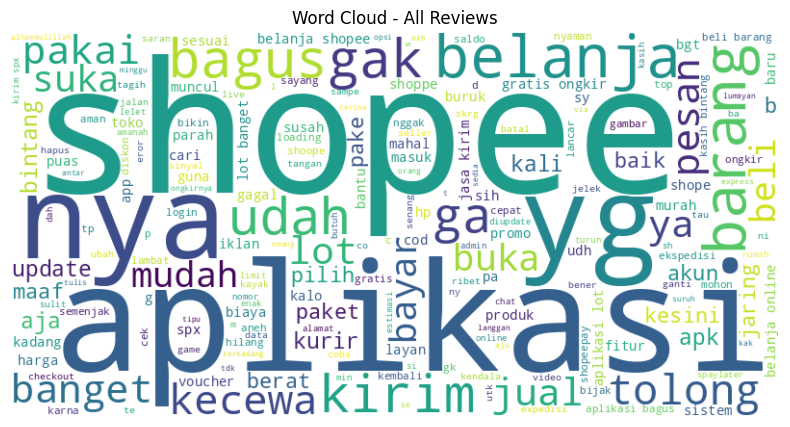

In [ ]:
create_word_cloud(data_clean['text_steamindo'].to_string(), 'Word Cloud - All Reviews')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_clean['text_steamindo'], data_clean['Label'], test_size=0.2, random_state=0)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(tfidf_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary", pos_label="Negatif")
recall = recall_score(y_test, y_pred, average="binary", pos_label="Negatif")
f1 = f1_score(y_test, y_pred, average="binary", pos_label="Negatif")

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.74
Precision: 0.73
Recall: 1.00
F1 Score: 0.84


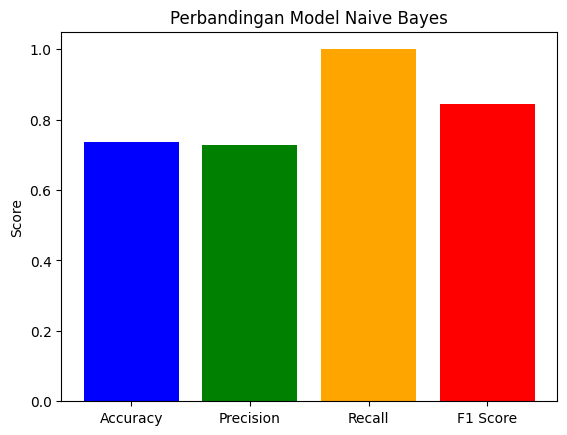

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_nb = [accuracy, precision, recall, f1]
plt.bar(labels, scores_nb, color=['blue', 'green', 'orange', 'red'])
plt.title('Perbandingan Model Naive Bayes')
plt.ylabel('Score')
plt.show()



In [ ]:
positif_count = len(data_clean[data_clean['Label'] == 'Positif'])
negatif_count = len(data_clean[data_clean['Label'] == 'Negatif'])
total_reviews = len(data_clean)
positif_percentage = (positif_count / total_reviews) * 100
negatif_percentage = (negatif_count / total_reviews) * 100


In [ ]:
print(f'Persentase Sentimen Positif: {positif_percentage:.2f}%')
print(f'Persentase Sentimen Negatif: {negatif_percentage:.2f}%')

Persentase Sentimen Positif: 28.52%
Persentase Sentimen Negatif: 71.48%
